In [142]:
import pandas as pd
import json
import random

import os
import matplotlib.pyplot as plt
import numpy as np

## Flattenning the JSON Data given in dataset.

In [143]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format



#Code to transform the json format columns in table
def json_read(dir_path , nrows=None):
    
    data_frame = dir_path 
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     nrows = nrows
                     )
    
    for column in columns: 
        #It will normalize and set the json to a table
        column_as_df = pd.json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df 

In [144]:
# Creating Dataframe using train.csv
#taking the full dataset initially and choose a subset after some transformations.
df = json_read(r"train.csv")

Loaded train.csv. Shape: (903653, 55)


In [145]:
pd.options.display.max_columns = 60
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,1,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not ava

In [146]:
#understanding stats of the data
df.describe()


,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [147]:
df.shape

(903653, 55)

In [148]:
df.dtypes

channelGrouping                                      object
date                                                  int64
fullVisitorId                                        object
sessionId                                            object
socialEngagementType                                 object
visitId                                               int64
visitNumber                                           int64
visitStartTime                                        int64
device.browser                                       object
device.browserVersion                                object
device.browserSize                                   object
device.operatingSystem                               object
device.operatingSystemVersion                        object
device.isMobile                                        bool
device.mobileDeviceBranding                          object
device.mobileDeviceModel                             object
device.mobileInputSelector              

In [149]:
def Null_Count(df):
    # this operation gives a dataframe of number of null values corresponding to column name.
    df_null = df.isnull().sum().sort_values(ascending = False).rename("Null").reset_index()
    return df_null


In [150]:
df_null = Null_Count(df)


## Finding Null percentage for major columns

In [151]:
n_rows = df.shape[0]
null_percent = (df_null['Null']*100)/n_rows

df_null = pd.concat([df_null['index'] , df_null['Null'], null_percent],axis = 1 , keys=['Column','Null_rows','Null_percent'])
df_null = df_null[df_null['Null_percent']!=0.00]
print(df_null)

                                          Column  Null_rows  Null_percent
0                     trafficSource.campaignCode     903652     99.999889
1                        trafficSource.adContent     892707     98.788694
2                      totals.transactionRevenue     892138     98.725728
3       trafficSource.adwordsClickInfo.isVideoAd     882193     97.625195
4   trafficSource.adwordsClickInfo.adNetworkType     882193     97.625195
5            trafficSource.adwordsClickInfo.slot     882193     97.625195
6            trafficSource.adwordsClickInfo.page     882193     97.625195
7           trafficSource.adwordsClickInfo.gclId     882092     97.614018
8                     trafficSource.isTrueDirect     629648     69.678073
9                     trafficSource.referralPath     572712     63.377425
10                         trafficSource.keyword     502929     55.655102
11                                totals.bounces     453023     50.132407
12                              totals

In [152]:
#Changing revenue type from object to float
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float)

### What do you do about missing data (if any)?
- Adding default value as 0.0 for all nan values in transactionRevenue data variables because the 'No purchase' entries are encoded as NaN values.

In [153]:
df['totals.transactionRevenue'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: totals.transactionRevenue, dtype: float64

In [154]:
# Filling default values for records with null revenue
df['totals.transactionRevenue'].fillna(0.0, inplace=True)

In [155]:
df['totals.transactionRevenue'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: totals.transactionRevenue, dtype: float64

## Checking Revenue generated corresponding to each visitorId

In [195]:
# Resampling the analytical dataset



#resampling the dataset by eliminating "no purchase" visitors
resampled_df = df[df['totals.transactionRevenue']!=0.0].reset_index()

# grouping by on the basis of fullVisitorId and adding up all the purchases .
grouped_df = resampled_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
print(grouped_df.shape , df.shape)

print(f"only {resampled_df.shape[0]} enteries are available out of {df.shape[0]} entries in the dataset with 'no zero purchase' , {grouped_df.shape[0]} are number of visitors who purchased in past .")


(9996, 2) (903653, 31)
only 11515 enteries are available out of 903653 entries in the dataset with 'no zero purchase' , 9996 are number of visitors who purchased in past .


In [196]:
# Calculating mean and max for checking the average values in revenue series
resampled_df['totals.transactionRevenue'].unique().mean() , resampled_df['totals.transactionRevenue'].unique().max()


(234833006.37659416, 23129500000.0)

- It is worth noting that mean value is so much inflated for each transaction which is not possible in ideal cases so we will normalising these values
by dividing by 10^6.

In [197]:
# Dividing all data points by 10^6 in original dataframe.
resampled_df['totals.transactionRevenue'] = resampled_df['totals.transactionRevenue']//(10**6)

In [199]:
resampled_df['totals.transactionRevenue'].unique().mean() , resampled_df['totals.transactionRevenue'].unique().max()

(765.1433370660694, 23129.0)

## Checking No. Of Uniques for each data column

In [163]:
#checking the total unique values for each column in original dataframe
df2 = pd.DataFrame()
df2['Name'] = [col for col in df.columns]
df2['Uniques'] = [df[col].nunique() for col in df.columns]

In [164]:
# Sorting on the basis of unique values 
df2.sort_values(by = 'Uniques')

,Name,Uniques
54,trafficSource.campaignCode,1
33,geoNetwork.longitude,1
34,geoNetwork.networkLocation,1
35,totals.visits,1
38,totals.bounces,1
22,device.screenResolution,1
21,device.screenColors,1
20,device.language,1
19,device.flashVersion,1
18,device.mobileDeviceMarketingName,1


## Removing Constant Columns
### which data columns are most applicable? Which data columns can I eliminate, knowing they won’t solve our problem scenario?
- Removing those columns which contains singular unique value. Their presence does not contribute meaningfully to the analytical process and can be considered redundant. By eliminating these columns, the dataset is streamlined, focusing resources on variables that exhibit variability and are more likely to offer insights during the exploratory phase of data analysis.

In [165]:
# Removing Constant Columns
constant_cols = [row.Name for row in df2.itertuples(index=False) if row.Uniques==1]
print(constant_cols)
#dropping constant_columns from original training dataframe
df.drop(constant_cols, axis=1, inplace=True)


['socialEngagementType', 'device.browserVersion', 'device.browserSize', 'device.operatingSystemVersion', 'device.mobileDeviceBranding', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.flashVersion', 'device.language', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'totals.bounces', 'totals.newVisits', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.isTrueDirect', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.campaignCode']


In [166]:
df.shape

(903653, 31)

## Checking and calculating outliers 
### Are there data outliers?
- It is found that there are 99 outliers found for the target variable "transactionRevenue" .

In [23]:
def calc_outliers(df_train):
    # mean value , standard deviation is calculated
    mean_val , std_val = np.mean(df_train) , np.std(df_train)

    # this is the cutoff for the acceptable values for our case , it can vary as per use case.
    threshold = std_val * 4

    # defining in what bracket our data points should lie and outside of this all values are considered an outlier
    lower_threshold = mean_val - threshold
    upper_threshold = mean_val + threshold
    lower_outliers = 0
    upper_outliers = 0
    #store indices of all occuring outliers
    outliers_indices = []
    for idx , point in enumerate(df_train):
        if point < lower_threshold:
            lower_outliers+=1
            outliers_indices.append(idx)
        if point > upper_threshold:
            upper_outliers+=1
            outliers_indices.append(idx)
    print(f"Lower Outliers: {lower_outliers}")
    print(f"Upper Outliers: {upper_outliers}")
    return outliers_indices

In [174]:
#calculating outliers for our resampled dataframe 
outlier_indices = calc_outliers(resampled_df['totals.transactionRevenue'])
print(outlier_indices)
resampled_df_filtered = resampled_df.drop(outlier_indices)
print(f" filtered rows now  : {resampled_df_filtered.shape[0]}")

Lower Outliers: 0
Upper Outliers: 32
[1169, 1767, 1918, 1919, 2428, 2934, 3240, 3736, 3804, 4488, 4622, 4865, 5005, 5489, 5636, 5693, 6061, 6276, 6797, 6849, 7323, 7348, 7507, 7543, 7950, 7988, 8220, 9038, 9042, 9105, 9416, 9817]
 filtered rows now  : 9964


In [175]:
## Formatting the date in proper format
# df['date'].dtypes
def format_date(input_date):
    parsed_date = pd.to_datetime(str(input_date), format='%Y%m%d')
    return parsed_date

In [176]:
df['date'] = df['date'].apply(format_date)

In [177]:
df['date'].tail()

903648   2017-01-04
903649   2017-01-04
903650   2017-01-04
903651   2017-01-04
903652   2017-01-04
Name: date, dtype: datetime64[ns]

### Taking an example to understand how visitNumber changing
 

In [182]:
# here taking a sample fullvisitorid for checking how many session he have.
df3=df[df['fullVisitorId'] == "27294437909732085"]
df3.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.networkDomain,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adContent
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,1,1,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
477847,Organic Search,2016-08-10,27294437909732085,27294437909732085_1470838286,1470838286,1,1470838286,Chrome,Android,True,mobile,Europe,Northern Europe,United Kingdom,not available in demo dataset,not available in demo dataset,not available in demo dataset,btcentralplus.com,1,1,0.0,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN


## Finding the correlation between visitNumber and revenue
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- revenue - Total revenue made during that visit.

In [207]:
df4 = resampled_df[["totals.transactionRevenue" , "date"]].reset_index()
df4.shape

(11515, 3)

In [208]:
df4.head()

,index,totals.transactionRevenue,date
0,0,37.0,2016-09-02
1,1,306.0,2016-09-02
2,2,68.0,2016-09-02
3,3,26.0,2016-09-02
4,4,574.0,2016-09-02


In [209]:
df4 = df4.drop("index" , axis = 1)


In [210]:
df4.head()

,totals.transactionRevenue,date
0,37.0,2016-09-02
1,306.0,2016-09-02
2,68.0,2016-09-02
3,26.0,2016-09-02
4,574.0,2016-09-02


In [217]:
#taking total revenue made per day 
df4 = df4.groupby(by="date",axis=0).sum()
df4.head()

C:\Users\abhishekchauhan01\AppData\Local\Temp\ipykernel_16272\3530418539.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df4 = df4.groupby(by="date",axis=0).sum()


,totals.transactionRevenue
date,
2016-08-01,6094.0
2016-08-02,1352.0
2016-08-04,1173.0
2016-08-05,5569.0
2016-08-06,1887.0


In [218]:
#similarly we will take total sum of visitNumber per day
df5 = resampled_df[["date","visitNumber"]].groupby(by=["date"],axis=0).sum()
df5.head()

C:\Users\abhishekchauhan01\AppData\Local\Temp\ipykernel_16272\1359908318.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df5 = resampled_df[["date","visitNumber"]].groupby(by=["date"],axis=0).sum()


,visitNumber
date,
2016-08-01,159
2016-08-02,52
2016-08-04,58
2016-08-05,140
2016-08-06,43


Merge these two dataframe and perform visualization.

In [219]:
visitNumber_revenue_df = pd.merge(df4,df5,on="date",how="inner")
visitNumber_revenue_df.head()

,totals.transactionRevenue,visitNumber
date,,
2016-08-01,6094.0,159
2016-08-02,1352.0,52
2016-08-04,1173.0,58
2016-08-05,5569.0,140
2016-08-06,1887.0,43


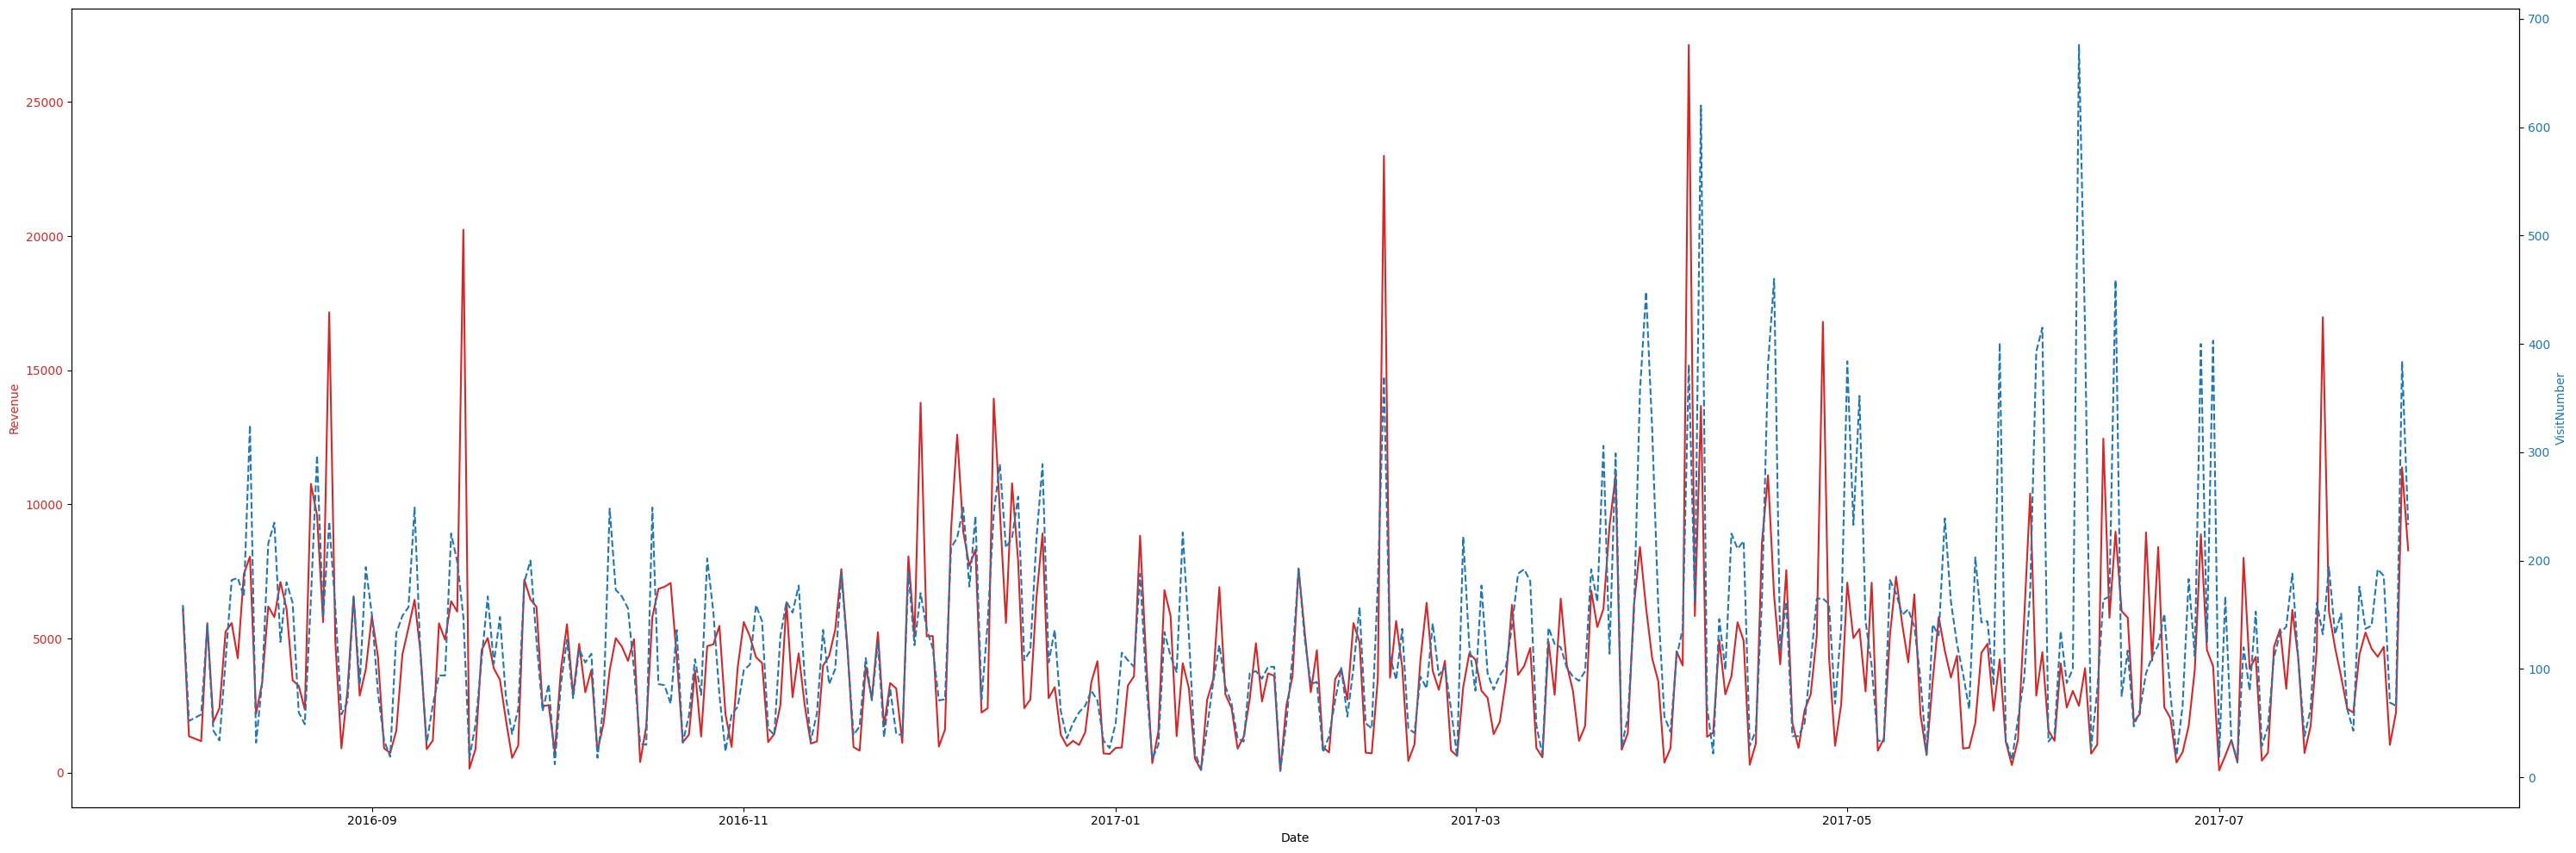

In [234]:
x = visitNumber_revenue_df.index
y1 = visitNumber_revenue_df['totals.transactionRevenue']
y2 = visitNumber_revenue_df['visitNumber']
fig ,ax1  =  plt.subplots(figsize=(30,10))

# plt.plot(x, y1, label='Line 1', color='blue', marker='o')

# # Plot the second line on the same axes
# plt.plot(x, y2, label='Line 2', color='red', linestyle='--', marker='s')

# # Add labels and a legend
# plt.xlabel('Date')
# plt.ylabel('Revenue')
# plt.title('Two Line Graphs')
# plt.legend()

# # Show the plot
# plt.show()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('VisitNumber', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

* It is clearly visible that the crest of both graphs are occuring at same time and almost we can see a completely similar behaviour here. 
Which means if we have more number of visitNumber , possiblity of having more revenue is high there.